# Análisis explotario

La extracción de esta base se realizó el 1 de septiembre.

https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies?resource=download

In [3]:
#Misc
import os
import pickle
import importlib

#Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualización
import cufflinks as cf
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
plt.style.use('seaborn-white')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
cf.set_config_file(theme='white',dimensions=(650,450))
cf.go_offline()

In [23]:
# Scripts personales
sys.path.insert(1, '../../Datasets/')


import PlotUtils 
importlib.reload(PlotUtils)


<module 'PlotUtils' from '../../Datasets\\PlotUtils.py'>

In [5]:
TMDb = pd.read_csv('../../Datasets/TMDb/archive.zip')

In [6]:
TMDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750318 entries, 0 to 750317
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    750318 non-null  int64  
 1   title                 750314 non-null  object 
 2   genres                527552 non-null  object 
 3   original_language     750318 non-null  object 
 4   overview              627720 non-null  object 
 5   popularity            750318 non-null  float64
 6   production_companies  348017 non-null  object 
 7   release_date          691518 non-null  object 
 8   budget                750318 non-null  float64
 9   revenue               750318 non-null  float64
 10  runtime               710997 non-null  float64
 11  status                750318 non-null  object 
 12  tagline               110743 non-null  object 
 13  vote_average          750318 non-null  float64
 14  vote_count            750318 non-null  float64
 15  

In [7]:
TMDb.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,610150,Dragon Ball Super: Super Hero,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,Shueisha-Fuji Television Network-Toei Animatio...,2022-06-11,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,Masako Nozawa-Toshio Furukawa-Yuko Minaguchi-H...,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg,507086-629015-616037-810693-361743-438148-7788...
1,616037,Thor: Love and Thunder,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,Marvel Studios-Kevin Feige Productions,2022-07-06,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,Chris Hemsworth-Christian Bale-Tessa Thompson-...,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg,2-438148-45920-507086-361743-919355-748918-718...


In [8]:
TMDb['release_date'] = pd.to_datetime(TMDb['release_date'],infer_datetime_format=True)
TMDb['year'] = TMDb['release_date'].dt.year
TMDb['month'] = TMDb['release_date'].dt.month
TMDb['day'] = TMDb['release_date'].dt.day

In [9]:
vars = ['id','genres','original_language','overview','popularity','year','month','day','budget','revenue','runtime','status','tagline','vote_average','vote_count','keywords','poster_path','backdrop_path']

In [10]:
TMDb = TMDb[vars]
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


In [11]:
um = 'id'
str_vars = ['overview','tagline','keywords']
cat_vars = ['genres','original_language','status']
num_vars = ['popularity','year','month','day','budget','revenue','runtime','vote_average','vote_count']

# Análisis exploratorio

In [12]:
TMDb[cat_vars].describe()

,genres,original_language,status
count,527552,750318,750318
unique,10757,166,6
top,Documentary,en,Released
freq,96647,397679,742354


In [13]:
TMDb[num_vars].describe()

,popularity,year,month,day,budget,revenue,runtime,vote_average,vote_count
count,750318.000000,691518.000000,691518.000000,691518.000000,7.503180e+05,7.503180e+05,7.109970e+05,750318.000000,750318.000000
mean,1.888280,1996.720393,5.917975,12.890759,3.734977e+05,9.303261e+05,1.948804e+02,2.473829,25.533423
std,18.340024,27.742843,3.830143,9.851363,7.923059e+06,2.016022e+07,8.444180e+04,3.178692,356.171585
min,0.600000,1874.000000,1.000000,1.000000,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000,0.000000
25%,0.600000,1984.000000,2.000000,3.000000,0.000000e+00,0.000000e+00,5.000000e+00,0.000000,0.000000
50%,0.600000,2009.000000,6.000000,12.000000,0.000000e+00,0.000000e+00,5.200000e+01,0.000000,0.000000
75%,1.325000,2017.000000,10.000000,21.000000,0.000000e+00,0.000000e+00,9.000000e+01,5.600000,2.000000
max,7294.015000,2049.000000,12.000000,31.000000,5.000000e+09,4.783787e+09,5.050505e+07,10.000000,32169.000000


## Valores ausentes

In [13]:
VA = pd.DataFrame(TMDb.isna().sum(),columns = ['n'])
VA['%'] = round(VA['n']/TMDb.shape[0]*100,2)
VA

,n,%
id,0,0.00
genres,222766,29.69
original_language,0,0.00
overview,122598,16.34
popularity,0,0.00
year,58800,7.84
month,58800,7.84
day,58800,7.84
budget,0,0.00
revenue,0,0.00


## Visualización de datos

### Variables categóricas

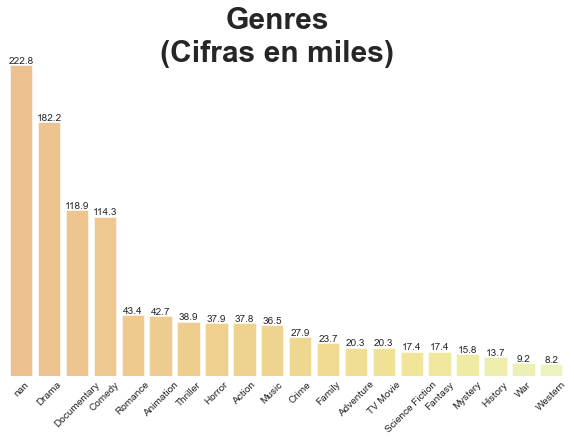

In [17]:
aux = TMDb['genres'].apply(lambda x: str(x).split('-')).explode()
aux = pd.DataFrame(aux,columns = ['genres'])
PlotUtils.bar(aux,'genres',title = 'Genres\n(Cifras en miles)',barlabs=True,format=True,scaled=1000)
plt.xticks(rotation=45,ha='center')
plt.show()

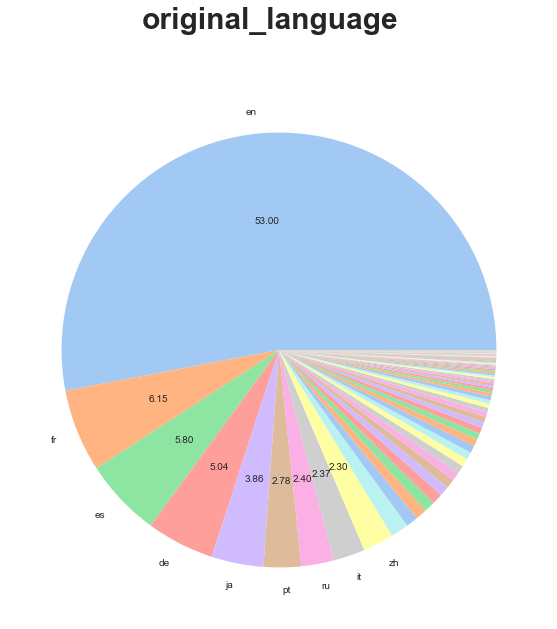

In [24]:
PlotUtils.pie(TMDb,'original_language',legend=False,threshold=2)

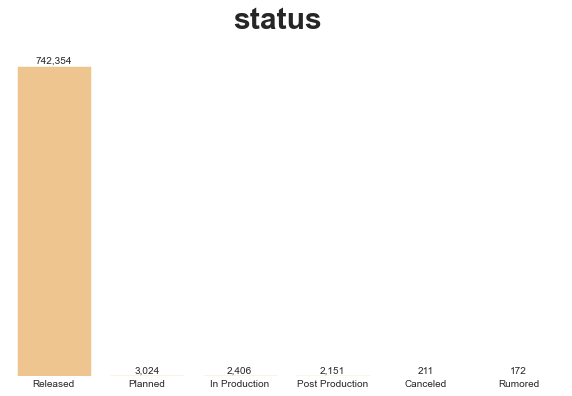

In [16]:
bar(TMDb,'status',top=10,barlabs=True,format=True)

### Variables numéricas

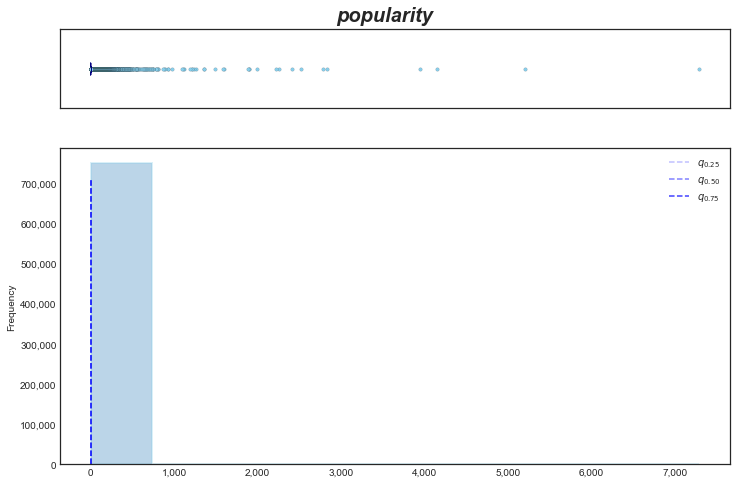

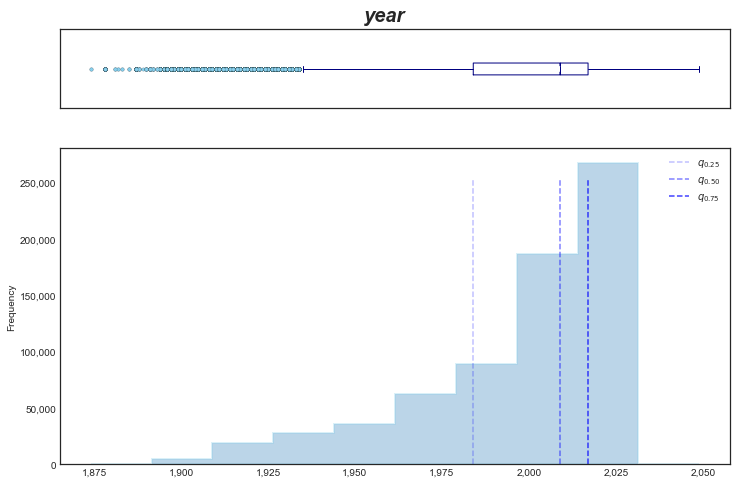

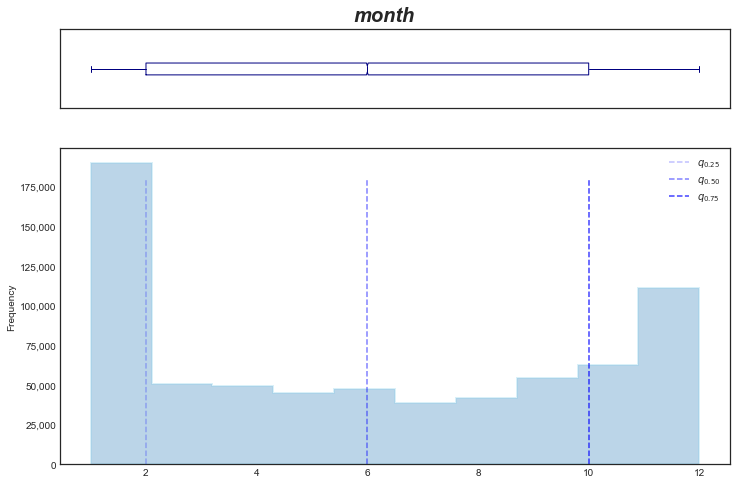

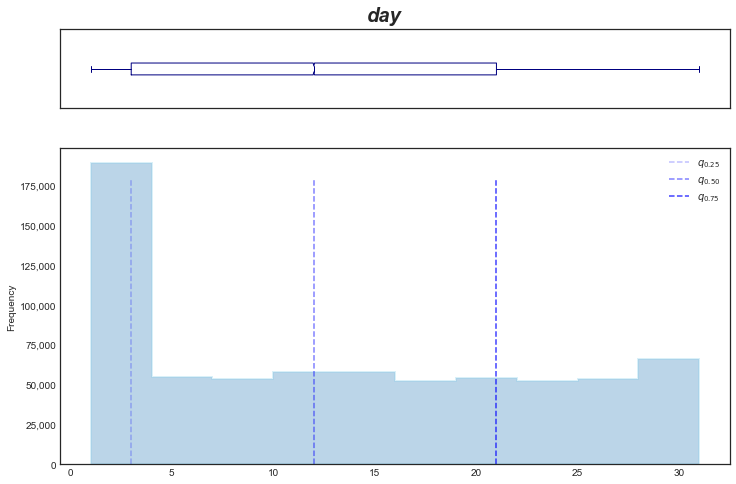

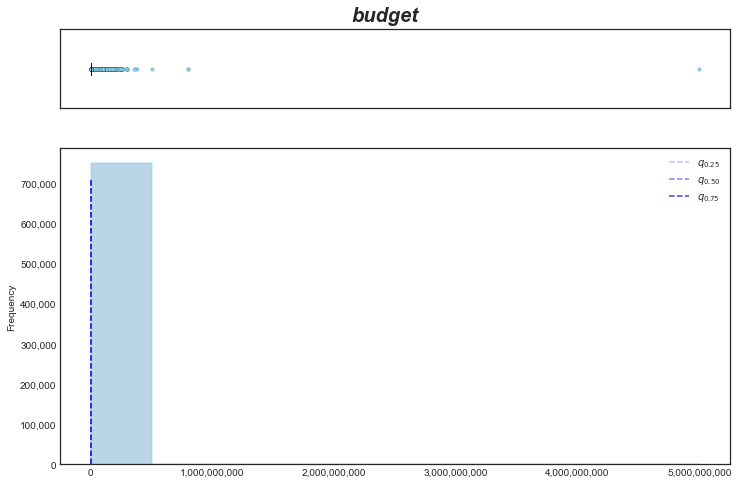

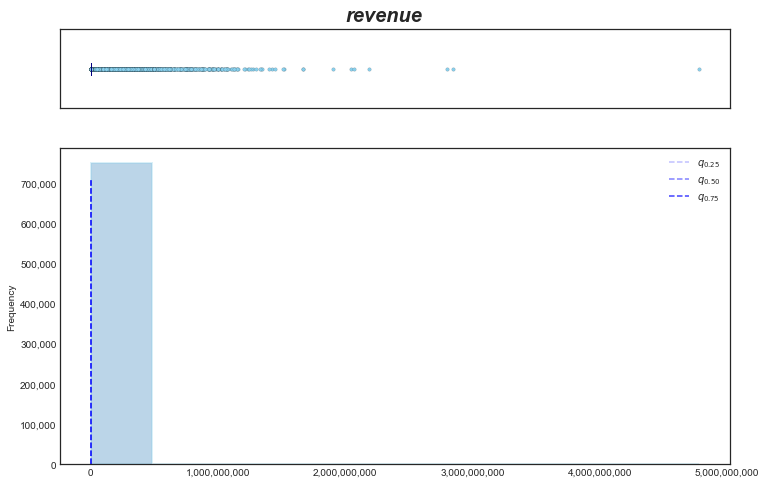

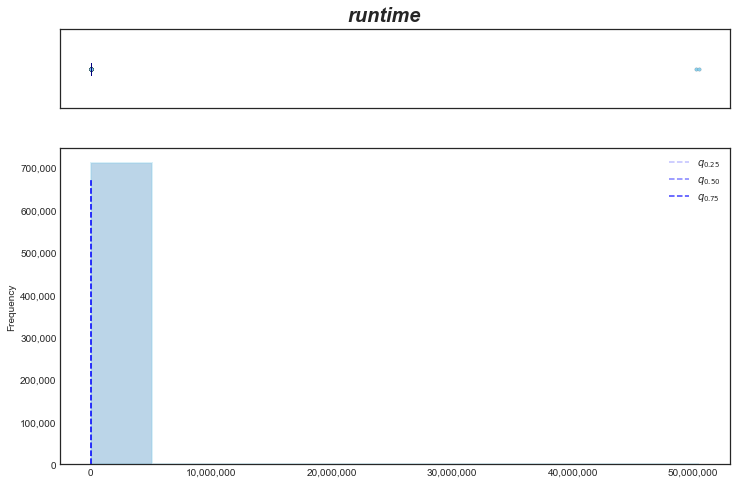

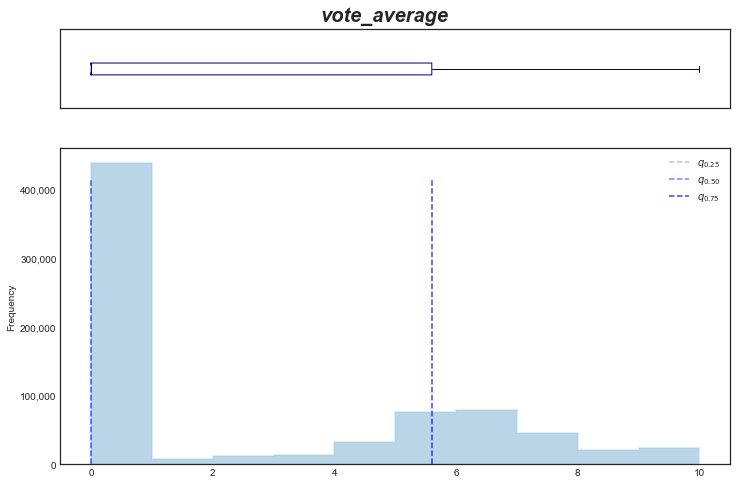

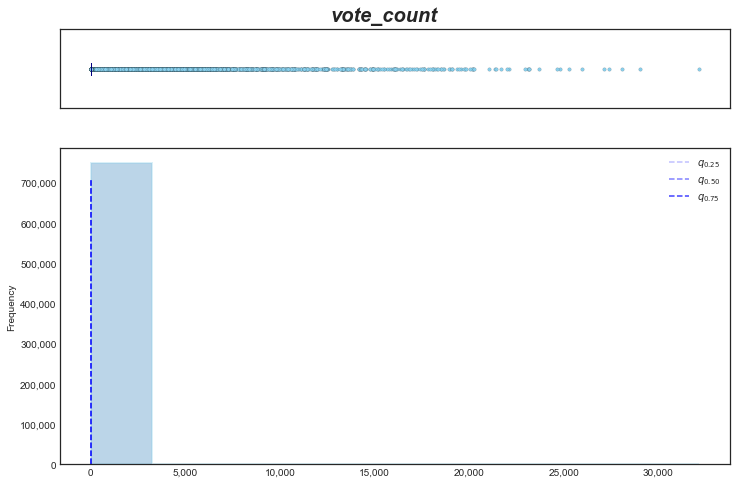

In [17]:
for var in num_vars:
    hist_box(TMDb,var)

## Normalizacion

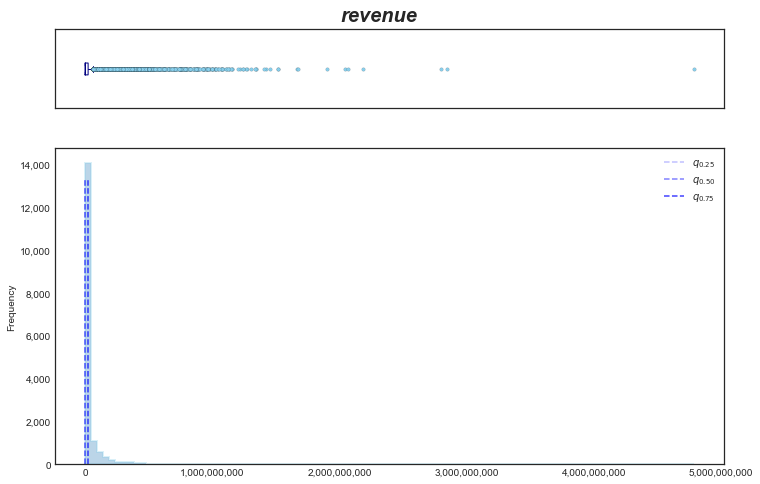

In [18]:
aux = TMDb['revenue'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['revenue'])
hist_box(aux,'revenue',nbins=100)

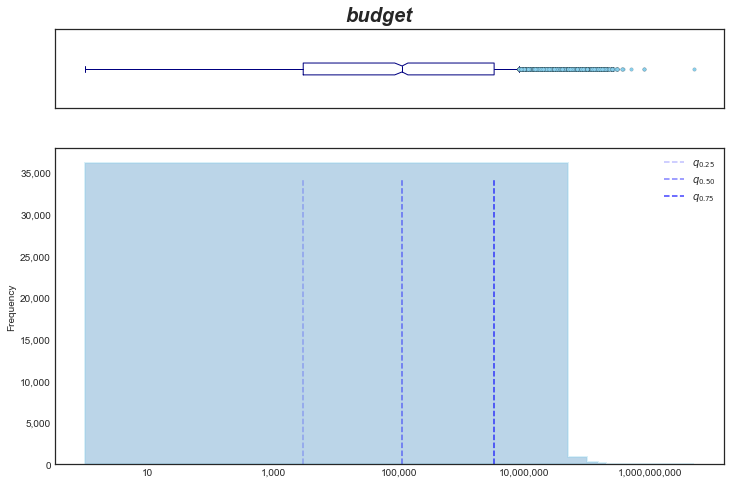

In [19]:
aux = TMDb['budget'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['budget'])
hist_box(aux,'budget',nbins=100,logx=True)

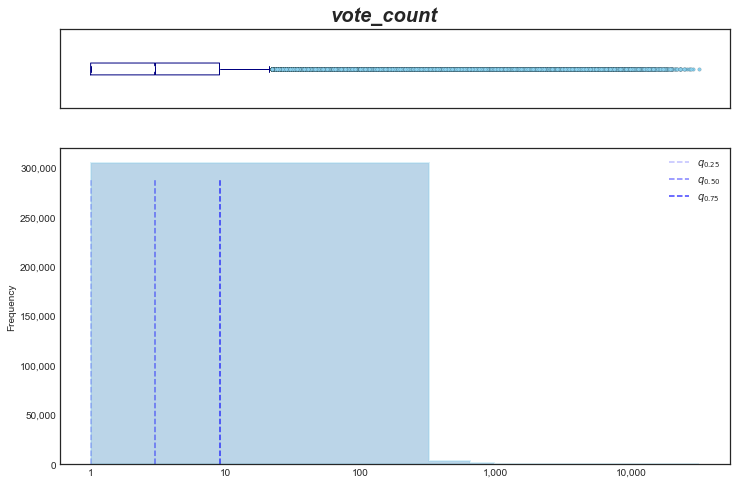

In [20]:
aux = TMDb['vote_count'].where(lambda x : x !=0).dropna()
aux = pd.DataFrame(aux,columns = ['vote_count'])
hist_box(aux,'vote_count',nbins=100,logx=True)

In [62]:
TMDb.to_feather('DBM1',compression='zstd')